In [1]:
using Pkg, Revise
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot
import DataFrames

  Activating new project at `C:\Users\sutha\OneDrive\Documents\Kuliah\Skripsi\ClapeyronThermo Clapeyron.jl master examples`


In [2]:
using Clapeyron

glycine_data = """Clapeyron Database File
My SolidHfus Parameters
species,Mw,Tm,Hfus
glycine,75.0666,578,24100
"""
#------------------------------------------------------------------------
#data ambil dari fuchs (2006)
#------------------------------------------------------------------------
like_parameter = """Clapeyron Database File
PCSAFT Like Parameters [csvtype = like,grouptype = PCSAFT]
species,Mw,segment,sigma,epsilon
glycine,75.07,3.79,2.61,320
water,18,1.2047,2.811,353.95
ethanol,46.07,2.3827,3.18,198.24
"""
#segment = jumlah segmen
#sigma = diameter segmen
#epsilon = parameter energi
#------------------------------------------------------------------------
unlike_parameter = """Clapeyron Database File
PCSAFT Unlike Parameters [csvtype = unlike,grouptype = PCSAFT]
species1,species2,k
glycine,water,-0.0665
glycine,ethanol,0.054
water,ethanol,-0.0382
"""
#k = interaksi biner
#------------------------------------------------------------------------
assoc_parameter = """Clapeyron Database File
PCSAFT Assoc Parameters [csvtype = assoc,grouptype = PCSAFT]
species1,site1,species2,site2,epsilon_assoc,bondvol
glycine,H,glycine,e,1539.53,0.025
glycine,e,glycine,H,1539.53,0.025
water,H,water,e,2425.67,0.045
water,e,water,H,2425.67,0.045
ethanol,H,ethanol,e,2653.38,0.032
ethanol,e,ethanol,H,2653.38,0.032
"""
#epsilon_assoc = parameter energi asosiasi
#bondvol = volume asosiasi
#------------------------------------------------------------------------

components = [("water"), ("ethanol"), ("glycine")]

model = CompositeModel(components;
                       fluid = PCSAFT,
                       solid = SolidHfus,
                       solid_userlocations = [glycine_data],
                       fluid_userlocations = [like_parameter,unlike_parameter,assoc_parameter])

Composite Model with 3 components:
 "water"
 "ethanol"
 "glycine"
Solid Model: SolidHfus("water", "ethanol", "glycine")
Fluid Model: PCSAFT{BasicIdeal, Float64}("water", "ethanol", "glycine")

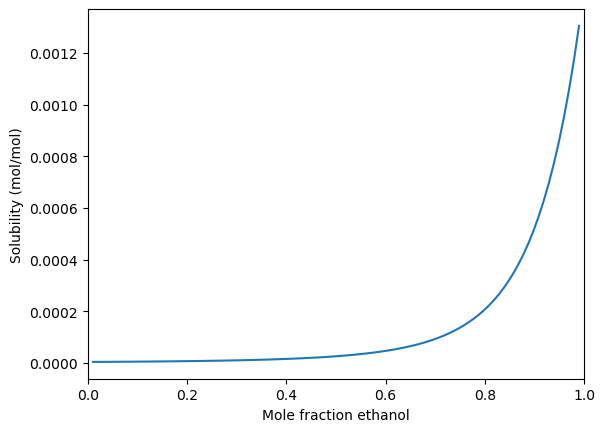

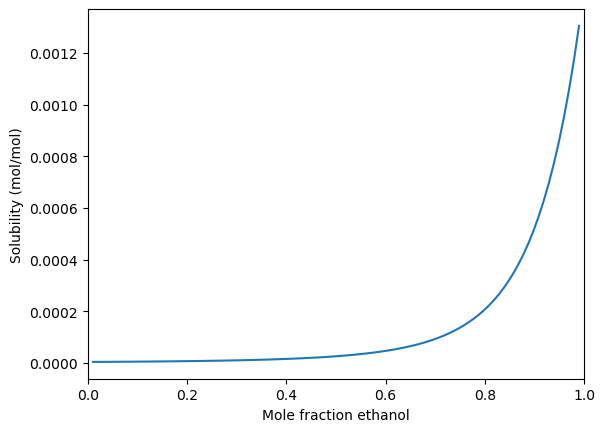

In [4]:
using Clapeyron

T = 270
p = 100000
x = LinRange(0.,1.,100)

s = zeros(length(x))

for i in 1:length(s)
    s[i] = sle_solubility(model,p,T,[x[i],1-x[i],0.];solute=["glycine"])[3]
end

plt.clf()
plt.plot(x,s)
plt.xlabel("Mole fraction ethanol")
plt.ylabel("Solubility (mol/mol)")
plt.xlim(0,1)
display(plt.gcf())